In [8]:
from pandas import read_csv

path='/home/p/s7/mLLabsheet/College/Lab3/diabetes_dataset.csv'
data=read_csv(path)
print(data.shape)
X=data.values[:,0:8]
Y=data.values[:,8]
print("X",X)
print("Y",Y)


(768, 9)
X [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Y [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 

In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)
X=scaled_X

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print(X_test[0])
print(X_test[1])

[0.52941176 0.56281407 0.67213115 0.24242424 0.         0.42026826
 0.51409052 0.48333333]
[0.17647059 0.40201005 0.67213115 0.31313131 0.08274232 0.50968703
 0.51836038 0.1       ]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[87 18]
 [20 29]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       105
         1.0       0.62      0.59      0.60        49

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X):
  print("Train:",train_index.size,"\nValidation:",test_index.size)
  X_train,X_test = X[train_index],X[test_index]
  y_train,y_test = Y[train_index],Y[test_index]
  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))


Train: 691 
Validation: 77
[[42  6]
 [ 8 21]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        48
         1.0       0.78      0.72      0.75        29

    accuracy                           0.82        77
   macro avg       0.81      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77

Train: 691 
Validation: 77
[[45  6]
 [10 16]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        51
         1.0       0.73      0.62      0.67        26

    accuracy                           0.79        77
   macro avg       0.77      0.75      0.76        77
weighted avg       0.79      0.79      0.79        77

Train: 691 
Validation: 77
[[42  5]
 [13 17]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        47
         1.0       0.77      0.57      0.65        30

    accuracy                           0.77 

In [17]:
from numpy import std
from numpy import mean
cv = KFold(n_splits=10,random_state=1,shuffle=True)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier,X_test,y_test,scoring = 'accuracy',cv=10,n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.698 (0.142)


In [18]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in kf.split(X):
  print("Train:",train_index.size,"\nValidation:",test_index.size)

Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 691 
Validation: 77
Train: 692 
Validation: 76
Train: 692 
Validation: 76


In [19]:
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5,random_state= None,n_repeats=10)
for train_index,test_index in kf.split(X):
  print("Train:",train_index.size,"\nValidation:",test_index.size)
  

Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 614 
Validation: 154
Train: 615 
Validation: 153
Train: 615 
Validation: 153
Train: 614 
Validati

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred =classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])

In [21]:
roc_auc = auc(fpr, tpr)

No handles with labels found to put in legend.


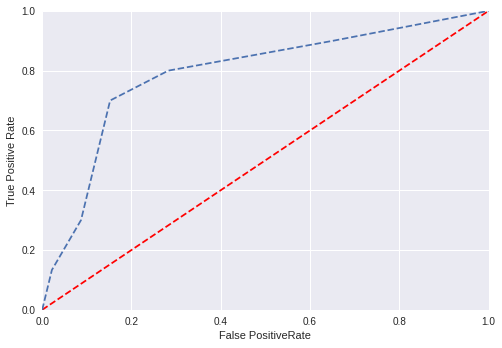

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.legend(loc ='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False PositiveRate')
plt.plot(fpr, tpr, linestyle='--', label = 'AUC = %0.2f' %roc_auc)
plt.show();